# 파이토치로 구현하는 신경망

## 신경망 모델 구현하기

In [12]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [13]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [14]:
print(x_train.shape)
print(type(x_train.shape))
print(y_train.shape)
print(y_train)

(80, 2)
<class 'tuple'>
(80,)
[2 1 2 3 1 3 2 1 2 3 0 0 2 1 0 1 1 3 0 0 1 1 0 0 0 3 2 0 1 2 3 2 3 0 3 2 1
 3 0 2 0 0 1 2 2 2 3 2 3 1 1 2 0 3 0 0 1 3 3 1 3 3 0 1 3 3 0 0 1 2 0 3 1 1
 2 3 2 2 2 1]


In [15]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

In [16]:
print(y_train.shape)
print(y_train)

(80,)
[1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 1 1 0]


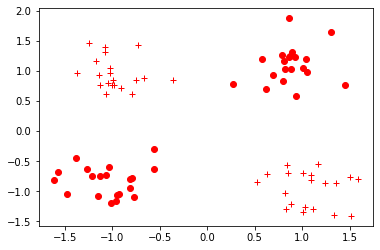

In [17]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [20]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [21]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)
            return output

In [22]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss() # loss 값을 알려주는 함수
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [23]:
model.eval() # model.train()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6577178239822388


오차값이 0.73 이 나왔습니다. 이정도의 오차를 가진 모델은 사실상 분류하는 능력이 없다고 봐도 무방합니다.
자, 이제 드디어 인공신경망을 학습시켜 퍼포먼스를 향상시켜 보겠습니다.

In [24]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    # forward
    train_output = model(x_train)
    if epoch == 1:
        print(train_output[0])
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    # backward
    train_loss.backward() # gradient 를 구해줘!
    optimizer.step() # gradinet 랑 learning_rate 를 이용해서 모델에 반영해줘!

Train loss at 0 is 0.6494613885879517
tensor([0.5358], grad_fn=<SelectBackward>)
Train loss at 100 is 0.5654569864273071
Train loss at 200 is 0.46242594718933105
Train loss at 300 is 0.3571654260158539
Train loss at 400 is 0.2639225125312805
Train loss at 500 is 0.191536083817482
Train loss at 600 is 0.14054743945598602
Train loss at 700 is 0.10648943483829498
Train loss at 800 is 0.08337071537971497
Train loss at 900 is 0.06733480095863342
Train loss at 1000 is 0.055801548063755035
Train loss at 1100 is 0.047231923788785934
Train loss at 1200 is 0.04069226235151291
Train loss at 1300 is 0.035583145916461945
Train loss at 1400 is 0.031509824097156525
Train loss at 1500 is 0.028198545798659325
Train loss at 1600 is 0.025464290753006935
Train loss at 1700 is 0.023174820467829704
Train loss at 1800 is 0.021234378218650818
Train loss at 1900 is 0.019572187215089798


In [26]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.044665589928627014


학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인 하실 수 있습니다.
지금까지 인공신경망을 구현하고 학습시켜 보았습니다.
이제 학습된 모델을 .pt 파일로 저장해 보겠습니다.

In [27]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.6080,  0.5985],
        [ 1.6480, -1.5784],
        [ 1.2253,  1.3047],
        [-1.1522, -1.2269],
        [-1.5075,  1.6593]])), ('linear_1.bias', tensor([-0.0418,  0.0174,  0.0021,  0.1252, -0.3795])), ('linear_2.weight', tensor([[ 0.6746,  2.1823, -1.6798, -1.6287,  2.1653]])), ('linear_2.bias', tensor([-1.1669]))])


`save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성됩니다. 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능합니다.

In [28]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9956578016281128
